By: Dominikus Krisna Herlambang | ©2023

# IDENTIFICATION OF VEGETATION AREAS IN THE PALEMBANG AND SURROUNDING AREA

## NDVI

NDVI (Normalized Difference Vegetation Index) is an index that describes the level of greenness of a plant. This index is a combination of the red band and the NIR (Near-Infrared Radiation) band which have long been used as indicators of the presence and condition of vegetation.

## 1) NDVI Equation (traditional NDVI calculation):

NDVI calculations are based on the principle that green plants grow effectively by absorbing radiation in the visible light spectrum region (PAR or Photosynthetically Active Radiation), while green plants strongly reflect radiation from the near infrared region. The concept of spectral patterns is based on this principle using only red band images, so NDVI can be calculated using the following formula:

    NDVI = (NIR – Red) / (NIR + Red).

Where NIR (near infrared radiation from pixels), and Red (red light radiation from pixels).


## 2) NDVI Usage & Calculation with Red Edge 3:

Red Edge 3 is a spectral band located between the Red and NIR bands. This band has high sensitivity to changes in vegetation, so it can increase NDVI accuracy.

When using Red Edge 3, the NDVI equation can be modified to:

    NDVI = (Red Edge 3 - Red) / (Red Edge 3 + Red)

This calculation produces NDVI values ​​that are similar to traditional NDVI calculations, but with higher accuracy.

The calculation "(Red Edge 3 - Red) / (Red Edge 3 + Red)" is a valid way to produce an NDVI visualization. Using Red Edge 3 can increase NDVI accuracy, especially in areas with dense vegetation.

___________________

NDVI values ​​range from -1 to 1. Plant health measurements can be carried out using the following classification of NDVI values:

    Value < 0, does not represent living things, such as roads, buildings, soil or dead plants.
    Value 0 – 0.33, unhealthy plant.
    Value 0.33 – 0.66, healthy plants.
    Value > 0.66, the plant is very healthy.

Before drone technology developed, NDVI imagery was obtained via satellite or aircraft mapping, so obtaining an NDVI map took a long time and was expensive. With the current development of drone and camera technology, obtaining NDVI imagery has become faster, easier and relatively cheap.

Increasing crop production must be balanced with the maintenance and monitoring activities carried out. This monitoring and maintenance activity aims to control the growth and development of the plant itself. Currently, technological advances in the field of photogrammetric mapping make it possible to analyze the health of vegetation using NDVI.

The use of NDVI analysis in industrial forest plantations such as oil palm, eucalyptus, acacia, and others will be very helpful in efforts to increase the value of production results.

### Integrating Colaboratory & Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Package Installation

In [ ]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.1 MB/s eta 0:00:00


In [ ]:
import ee
import geemap
import geemap.colormaps as cm
import matplotlib.pyplot as plt
import numpy as np
import rasterio
# Authenticate an Earth Engine account
#ee.Authenticate()
#ee.Initialize()

### Part 1

In [ ]:
Map = geemap.Map()
Map

In [ ]:
# Navigate to the area to be researched
Map.setCenter(104.66914633458155, -3.25663744146642038, 9);

In [ ]:
# Set target location
point=ee.Geometry.Point(104.66914633458155, -3.25663744146642038);

In [ ]:
image = ee.ImageCollection('COPERNICUS/S2_HARMONIZED') \
    .filterBounds(point) \
    .filterDate("2019-01-01","2019-12-31") \
    .sort('CLOUD_COVERAGE_ASSESSMENT') \
    .first()

In [ ]:
# Calculate NDVI option 1
ndvi=image.expression(
"(Red_Edge_3 - RED) / (Red_Edge_3 + RED)",
{"Red_Edge_3":image.select("B7"),
"RED":image.select("B4")});

# Calculate NDVI option 2
# ndvi = image.normalizedDifference(['B7', 'B4'])

In [ ]:
display={
    "min":0,
    "max":1,
    "palette":[ 'red','orange', 'yellow','yellowgreen', 'green','black']
}

In [ ]:
# Add true color images to the map console
Map.addLayer(ndvi,display);
Map.add_colorbar(display, label="Vegetation Density", layer_name="SRTM DEM");
Map

### Part 2 (Export Visualization Results as TIFF data to Google Drive)

In [ ]:
# Export NDVI image to Google Drive as GeoTIFF
task_config = {
    'image': ndvi,
    'description': 'NDVI_SUMS',
}

task = ee.batch.Export.image(**task_config)
task.start()

### Part 3 (Open and Read TIF File)

In [ ]:
# Open the TIF file
with rasterio.open('/content/drive/MyDrive/NDVI_SUMS.tif') as src:
    # Extract the NDVI band
    ndvi_tif = src.read(1)
    print(ndvi_tif)

[[0.7842827  0.7744046  0.74320847 ... 0.6527992  0.64889336 0.6377148 ]
 [0.7804616  0.76229066 0.7247348  ... 0.57475084 0.5873606  0.58510137]
 [0.7648     0.7324841  0.7432853  ... 0.57831323 0.57694745 0.56205755]
 ...
 [0.78752285 0.79133856 0.78891563 ... 0.78195095 0.6465222  0.77834755]
 [0.7861635  0.7683306  0.78311497 ... 0.7692924  0.6288423  0.7848207 ]
 [0.7738435  0.77991676 0.7630058  ... 0.7751116  0.6598755  0.7807309 ]]


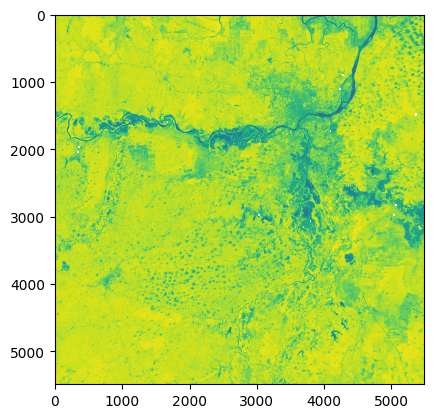

In [ ]:
# Open the TIF file
with rasterio.open('/content/drive/MyDrive/NDVI_SUMS.tif') as src:
    # Extract the NDVI band
    ndvi_tif = src.read(1)
    plt.imshow(ndvi_tif[:])
    plt.show()

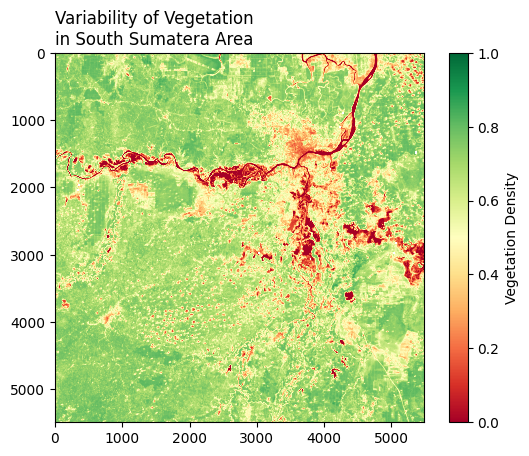

In [ ]:
# Open the TIF file
with rasterio.open('/content/drive/MyDrive/NDVI_SUMS.tif') as src:
    # Extract the NDVI band
    ndvi = src.read(1)

    # Display the NDVI image
    ndvi_keren = plt.imshow(ndvi[:], cmap = 'RdYlGn',
                             vmin = 0,
                             vmax = 1)

    plt.colorbar(ndvi_keren,label='Vegetation Density')
    plt.title("Variability of Vegetation\nin South Sumatera Area",
              loc='left')
    plt.show()